In [1]:
# add modules to Python's search path
import os, sys
from pathlib import Path
script_dir = Path(os.path.abspath(''))
module_dir = str(script_dir.parent)
print(script_dir)
print(module_dir)
sys.path.insert(0, module_dir + '/modules')

# import rest of the modules
import numpy as np
import tensorflow as tf
import solver as sol
import time

C:\Users\pinak\Documents\GitHub\BSDE\notebooks
C:\Users\pinak\Documents\GitHub\BSDE


In [10]:
sigma = np.sqrt(2.)

def mu(x):
    x0, x1 = tf.split(x, [1, 1], axis=1)
    z = -4.0 * (x0**2 + x1**2 - 1.0)
    return tf.concat([x0*z, x1*z], axis=1)


def f(t, x, y, z):
    x0, x1 = tf.split(x, [1, 1], axis=1) 
    z_ = 4.0 * (x0**2 + x1**2 - 1.0)
    return 4. * (z_+2.) * y

def g(x):
    x0, x1 = tf.split(x, [1, 1], axis=1)
    r = x0**2 + x1**2
    return tf.math.exp(-r) / (2.0 * np.pi)

solver = sol.DeepBSDE(mu=mu, fun_f=f, fun_g=g, num_neurons=20, time_steps=20, dir='../data', name='circle_solver')

In [11]:
epochs = 4000
solver.train(epochs)

  Iter        Loss|   Time
    0       0.0194   |   12.8
   10       0.0446   |   13.6
   20       0.1486   |   14.4
   30       0.0076   |   15.2
   40       0.0057   |   16.0
   50       0.0133   |   16.8
   60       0.0094   |   17.6
   70       0.0062   |   18.4
   80       0.0332   |   19.2
   90       0.0572   |   19.9
  100       0.0049   |   20.8
  110       0.0043   |   21.6
  120       0.0033   |   22.4
  130       0.0032   |   23.2
  140       0.0056   |   23.9
  150       0.0083   |   24.7
  160       0.0703   |   25.5
  170       0.0029   |   26.3
  180       0.0032   |   27.2
  190       0.0058   |   28.0
  200       0.0041   |   28.8
  210       0.0055   |   29.6
  220       0.0044   |   30.3
  230       0.0728   |   31.1
  240       0.0049   |   32.0
  250       0.1342   |   32.8
  260       0.0055   |   33.6
  270       0.0066   |   34.4
  280       0.0042   |   35.2
  290       0.0672   |   36.0
  300       0.0044   |   36.8
  310       0.0021   |   37.6
  320       0

 2730       0.0015   |  231.5
 2740       0.0021   |  232.2
 2750       0.0022   |  233.1
 2760       0.0017   |  233.9
 2770       0.0017   |  234.6
 2780       0.0020   |  235.4
 2790       0.0015   |  236.3
 2800       0.0021   |  237.0
 2810       0.0016   |  237.8
 2820       0.0022   |  238.6
 2830       0.0019   |  239.4
 2840       0.0021   |  240.3
 2850       0.0018   |  241.1
 2860       0.0023   |  241.9
 2870       0.0017   |  242.8
 2880       0.0016   |  243.6
 2890       0.0016   |  244.4
 2900       0.0023   |  245.1
 2910       0.0026   |  245.9
 2920       0.0026   |  246.7
 2930       0.0022   |  247.5
 2940       0.0017   |  248.3
 2950       0.0018   |  249.1
 2960       0.0014   |  249.9
 2970       0.0023   |  250.7
 2980       0.0019   |  251.5
 2990       0.0020   |  252.4
 3000       0.0015   |  253.2
 3010       0.0019   |  254.0
 3020       0.0016   |  254.8
 3030       0.0020   |  255.6
 3040       0.0018   |  256.4
 3050       0.0019   |  257.2
 3060     

[(0, 0.01944236, 12.797100305557251),
 (1, 0.15519345, 12.898033142089844),
 (2, 0.018840695, 12.979157447814941),
 (3, 0.012196621, 13.07119083404541),
 (4, 0.010452634, 13.147206783294678),
 (5, 0.01892212, 13.2212233543396),
 (6, 0.015360074, 13.315314531326294),
 (7, 0.019118406, 13.40132212638855),
 (8, 0.04209447, 13.471337795257568),
 (9, 0.029123511, 13.5463547706604),
 (10, 0.044574082, 13.616370677947998),
 (11, 0.0067055477, 13.693806171417236),
 (12, 0.013170873, 13.771825313568115),
 (13, 0.011676686, 13.852851867675781),
 (14, 0.009148258, 13.928859949111938),
 (15, 0.80772364, 14.013959884643555),
 (16, 0.010343598, 14.092991590499878),
 (17, 0.013716316, 14.169022798538208),
 (18, 0.003688144, 14.245054006576538),
 (19, 0.008819198, 14.335074424743652),
 (20, 0.14861915, 14.419107437133789),
 (21, 0.019906703, 14.508201122283936),
 (22, 0.0042564534, 14.58421778678894),
 (23, 0.01258492, 14.66252613067627),
 (24, 0.035430722, 14.739544153213501),
 (25, 0.061070535, 14.8

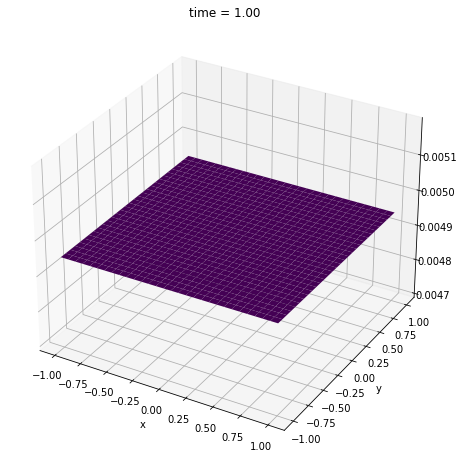

In [12]:
 solver.plot()

In [5]:
u = tf.random.uniform(shape=(100, 2))

In [6]:
mu(u)

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[ 0.7197255 ,  0.43803066],
       [ 0.00628693,  1.3702039 ],
       [ 1.2531818 ,  0.7361669 ],
       [ 0.71800494,  0.88542295],
       [ 0.21581791,  0.4619668 ],
       [ 0.79985166,  0.3554515 ],
       [ 0.8680313 ,  0.66395307],
       [ 0.93394107,  0.02739503],
       [ 0.3361525 ,  1.3919942 ],
       [ 0.2556049 ,  1.4998392 ],
       [-2.3088667 , -2.3851144 ],
       [ 1.3364496 ,  0.5902744 ],
       [ 0.7298564 ,  1.3546983 ],
       [ 0.2601988 ,  0.48256487],
       [-0.4023315 , -0.21583396],
       [ 0.30085552,  0.3444866 ],
       [-0.70583254, -0.51998   ],
       [ 0.9775665 ,  1.1832801 ],
       [ 0.4684653 ,  0.2471701 ],
       [ 0.01454922,  0.16954716],
       [-2.2228544 , -1.750632  ],
       [-1.2700353 , -0.75946474],
       [ 0.5517465 ,  0.6548432 ],
       [ 0.5538926 ,  0.2660366 ],
       [ 0.22911796,  0.4080574 ],
       [ 0.7735613 ,  1.3231521 ],
       [ 1.2377843 ,  0.04706002],
     

In [ ]:
solver.draw_X_and_dW(64)